# **DATA CHALLANGE - DSW**

# **Tim ALSubarasi**

Langkah-langkah:

1. Import Library
2. Load Data
3. Pemrosesan Data/Preprocessing
4. Ekplorasi dan Visualisasi Data
5. Pembuatan dan Pelatihan Model
6. Evaluasi Model
7. Tuning Model
8. Pengimplementasian Model
9. Dokumentasi

# **Import Library**

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# **Load Data**

In [ ]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
df = pd.read_csv('/content/drive/MyDrive/DSW/dsw.csv')

df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,"70,005",Yes,"106,81667","-6,20000","4210,7"
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,"91,91",Yes,"106,81667","-6,20000","3511,3"
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,"129,545",Yes,"106,81667","-6,20000","6983,6"
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,"136,24",Yes,"106,81667","-6,20000","6503,9"
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,"134,81",Yes,"106,81667","-6,20000",6942


# **Data Preprocessing**

In [42]:
df.shape

(7043, 16)

In [30]:
df.astype

<bound method NDFrame.astype of       Customer ID  Tenure Months Location Device Class        Games Product  \
0               0              2  Jakarta      Mid End                  Yes   
1               1              2  Jakarta     High End                   No   
2               2              8  Jakarta     High End                   No   
3               3             28  Jakarta     High End                   No   
4               4             49  Jakarta     High End                   No   
...           ...            ...      ...          ...                  ...   
7038         7038             72  Jakarta      Low End  No internet service   
7039         7039             24  Jakarta      Mid End                  Yes   
7040         7040             72  Jakarta     High End                   No   
7041         7041             11  Jakarta      Mid End                  Yes   
7042         7042             66  Jakarta     High End                  Yes   

            Music P

In [27]:
# cek kolom null
print(df.isnull().sum())

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64


In [43]:
kolomcv = ['Monthly Purchase (Thou. IDR)', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)']

# menghilangkan koma pada kolom Monthly Purchase (Thou. IDR)
df[kolomcv] = df[kolomcv].apply(lambda x: x.str.replace(',', '.')).astype(float)

# convert kolom 'Monthly Purchase (Thou. IDR)' ke float
# df[kolomcv] = df[kolomcv].astype(float)

In [44]:
# Drop kolom customerID
df.drop('Customer ID', axis=1, inplace=True)

In [45]:
# mengubah data categorical variables ke numerical variables
df = pd.get_dummies(df, columns=['Location', 'Device Class', 'Games Product', 'Music Product',
                                 'Education Product', 'Call Center', 'Video Product',
                                 'Use MyApp', 'Payment Method'])

In [46]:
df.head()

,Tenure Months,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Location_Bandung,Location_Jakarta,Device Class_High End,Device Class_Low End,...,Video Product_No,Video Product_No internet service,Video Product_Yes,Use MyApp_No,Use MyApp_No internet service,Use MyApp_Yes,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
0,2,70.005,Yes,106.81667,-6.2,4210.7,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,2,91.910,Yes,106.81667,-6.2,3511.3,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
2,8,129.545,Yes,106.81667,-6.2,6983.6,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
3,28,136.240,Yes,106.81667,-6.2,6503.9,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
4,49,134.810,Yes,106.81667,-6.2,6942.0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0


# **Membuat Model Training dan Testing**

In [47]:
# split data menjadi data training dan testing dengan perbandingan 80:20
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Scale the features dengan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# train dengan algoritma logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

# **Evaluasi**

In [51]:
# evaluasi model
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7899219304471257


In [52]:
print('Training score:', lr.score(X_train, y_train))
print('Testing score:', lr.score(X_test, y_test))

Training score: 0.7981895633652822
Testing score: 0.7899219304471257




---


# **Visualisasi**
**Menggunakan library seaborn**

**Churn = Berhenti Berlangganan**

**Diagram batang untuk menunjukkan jumlah pelanggan churn dan tidak churn**

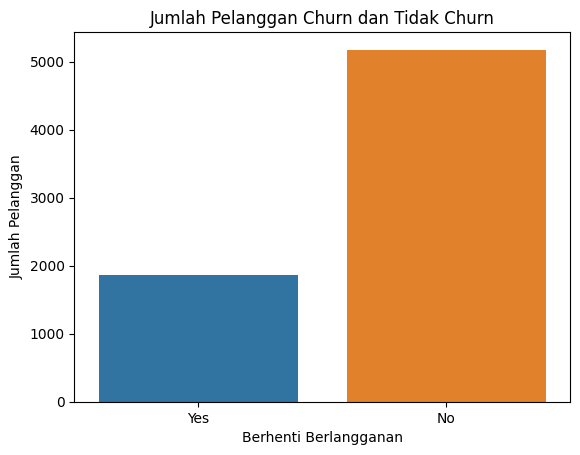

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn Label', data=df)
plt.title('Jumlah Pelanggan Churn dan Tidak Churn')
plt.xlabel('Berhenti Berlangganan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Diagram lingkaran untuk menunjukkan proporsi pelanggan churn dan tidak churn**

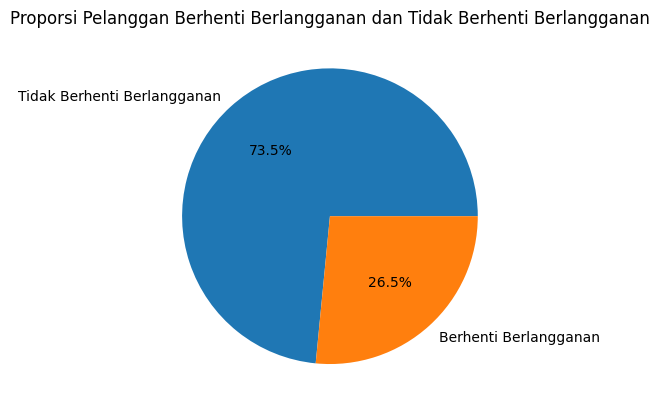

In [56]:
plt.pie(df['Churn Label'].value_counts(), labels=['Tidak Berhenti Berlangganan', 'Berhenti Berlangganan'], autopct='%1.1f%%')
plt.title('Proporsi Pelanggan Berhenti Berlangganan dan Tidak Berhenti Berlangganan')
plt.show()


**Diagram lingkaran untuk menunjukkan jenis pembayaran pelanggan:**

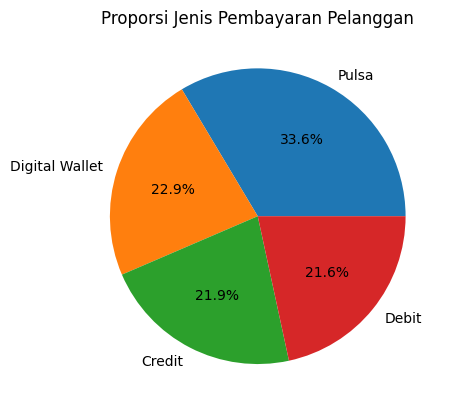

In [69]:
plt.pie(df['Payment Method'].value_counts(), labels=['Pulsa', 'Digital Wallet', 'Credit', 'Debit'], autopct='%1.1f%%')
plt.title('Proporsi Jenis Pembayaran Pelanggan')
plt.show()

**Diagram batang untuk menunjukkan jumlah pelanggan churn dan tidak churn berdasarkan jenis pembayaran pelanggan**

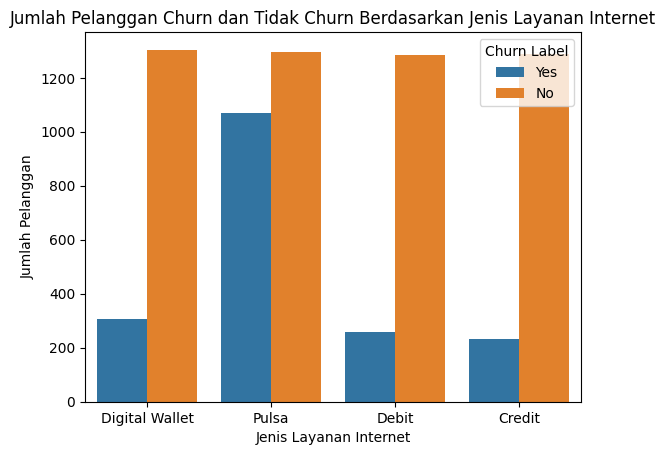

In [67]:
sns.countplot(x='Payment Method', hue='Churn Label', data=df)
plt.title('Jumlah Pelanggan Churn dan Tidak Churn Berdasarkan Jenis Layanan Internet')
plt.xlabel('Jenis Layanan Internet')
plt.ylabel('Jumlah Pelanggan')
plt.show()


**Diagram lingkaran untuk menunjukkan jenis device pelanggan:**

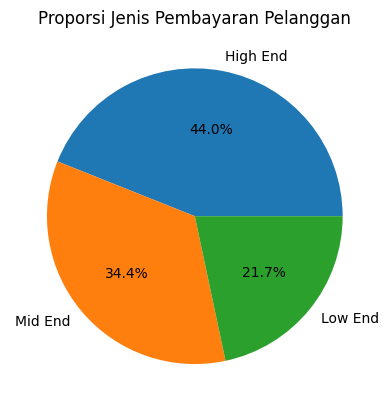

In [68]:
plt.pie(df['Device Class'].value_counts(), labels=['High End', 'Mid End', 'Low End'], autopct='%1.1f%%')
plt.title('Proporsi Jenis Pembayaran Pelanggan')
plt.show()

**Diagram batang untuk menunjukkan jumlah pelanggan churn dan tidak churn berdasarkan jenis device pelanggan**

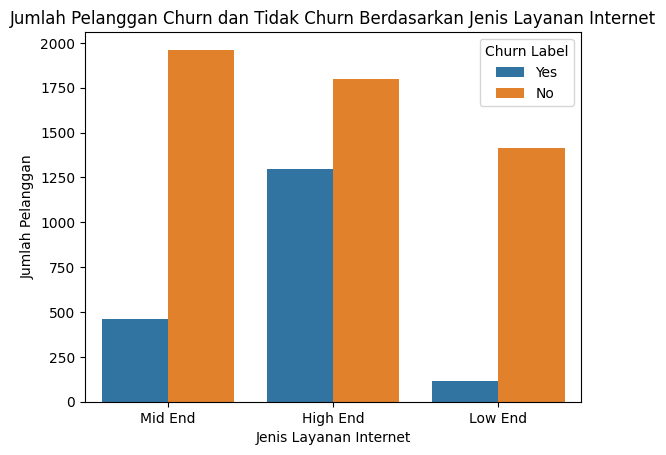

In [63]:
sns.countplot(x='Device Class', hue='Churn Label', data=df)
plt.title('Jumlah Pelanggan Churn dan Tidak Churn Berdasarkan Jenis Layanan Internet')
plt.xlabel('Jenis Layanan Internet')
plt.ylabel('Jumlah Pelanggan')
plt.show()
